# **Práctica 11: Pronóstico (Árboles de decisión)**

Nombre:

No. Cuenta:

Email:

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [39]:
!pip install yfinance
#!pip install googlefinance

In [40]:
"LIVEPOL1.MX"

'LIVEPOL1.MX'

In [41]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [42]:
# Para Amazon
DataAmazon = yf.Ticker('LIVEPOL1.MX')

In [43]:
AmazonHist = DataAmazon.history(start = '2005-1-1', end = '2022-12-22', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-01-03 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730,0,0.0,0
2005-01-04 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730,0,0.0,0
2005-01-05 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730,0,0.0,0
2005-01-06 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730,0,0.0,0
2005-01-07 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730,0,0.0,0
...,...,...,...,...,...,...,...
2022-12-15 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002,397,0.0,0
2022-12-16 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002,0,0.0,0
2022-12-19 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002,0,0.0,0


In [44]:
AmazonHist.to_csv("Liverpool.csv")

Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [45]:
AmazonHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4387 entries, 2005-01-03 00:00:00-06:00 to 2022-12-21 00:00:00-06:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4386 non-null   float64
 1   High          4386 non-null   float64
 2   Low           4386 non-null   float64
 3   Close         4386 non-null   float64
 4   Volume        4387 non-null   int64  
 5   Dividends     4387 non-null   float64
 6   Stock Splits  4387 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 274.2 KB


In [46]:
AmazonHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4386.000000,4386.000000,4386.000000,4386.000000,4.387000e+03,4387.000000,4387.0
mean,88.881717,89.013868,88.797729,88.940873,4.161450e+03,0.003891,0.0
std,51.584534,51.620104,51.503652,51.647016,5.359582e+04,0.048233,0.0
min,12.282730,12.282730,12.282730,12.282730,0.000000e+00,0.000000,0.0
25%,50.547031,51.034592,50.491781,50.491781,0.000000e+00,0.000000,0.0
50%,93.238586,93.238586,93.238586,93.238586,0.000000e+00,0.000000,0.0
75%,127.249214,127.443788,127.213692,127.222435,1.000000e+01,0.000000,0.0
max,218.822098,218.822098,218.822098,218.822098,1.848000e+06,1.200000,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

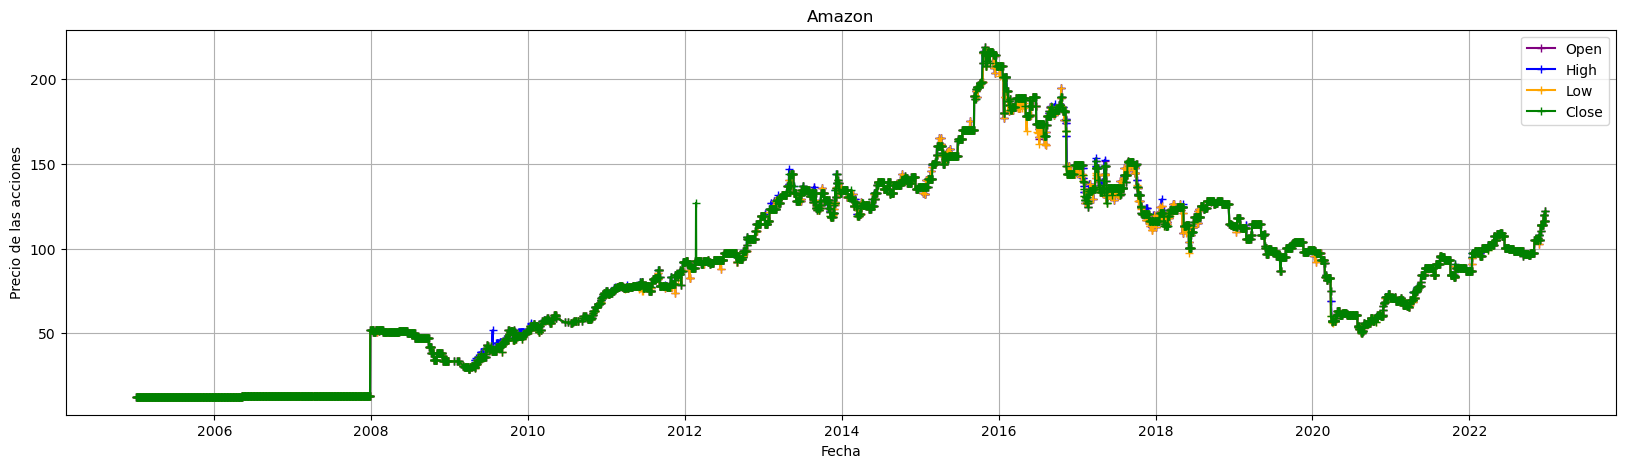

In [47]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='purple', marker='+', label='Open')
plt.plot(AmazonHist['High'], color='blue', marker='+', label='High')
plt.plot(AmazonHist['Low'], color='orange', marker='+', label='Low')
plt.plot(AmazonHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
MDatos = AmazonHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2005-01-03 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-04 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-05 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-06 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-07 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
...,...,...,...,...
2022-12-15 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002
2022-12-16 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002
2022-12-19 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002


In [49]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2005-01-03 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-04 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-05 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-06 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
2005-01-07 00:00:00-06:00,12.282730,12.282730,12.282730,12.282730
...,...,...,...,...
2022-12-15 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002
2022-12-16 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002
2022-12-19 00:00:00-06:00,116.400002,116.400002,116.400002,116.400002


### Aplicación del algoritmo

In [50]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [51]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,12.282730,12.282730,12.282730
1,12.282730,12.282730,12.282730
2,12.282730,12.282730,12.282730
3,12.282730,12.282730,12.282730
4,12.282730,12.282730,12.282730
...,...,...,...
4381,116.400002,116.400002,116.400002
4382,116.400002,116.400002,116.400002
4383,116.400002,116.400002,116.400002
4384,116.400002,116.400002,116.400002


In [52]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,12.282730
1,12.282730
2,12.282730
3,12.282730
4,12.282730
...,...
4381,116.400002
4382,116.400002
4383,116.400002
4384,116.400002


Se hace la división de los datos

In [53]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [54]:
pd.DataFrame(X_test)

,0,1,2
0,178.465561,178.465561,178.465561
1,69.544952,69.544952,69.544952
2,82.417840,91.127531,82.417840
3,51.885162,51.885162,51.885162
4,94.855446,94.855446,94.855446
...,...,...,...
873,121.668286,123.431595,121.668286
874,46.985306,46.985306,46.985306
875,128.721542,128.721542,128.721542
876,125.016739,125.016739,125.016739


Se entrena el modelo

In [55]:
PronosticoAD = DecisionTreeRegressor(random_state=0)
PronosticoAD.fit(X_train, Y_train)

#PronosticoAD = DecisionTreeRegressor(max_depth=10, min_samples_split=4, min_samples_leaf=2, random_state=0)
#PronosticoAD.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=0)

In [56]:
#Se genera el pronóstico
Y_Pronostico = PronosticoAD.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,178.465561
1,69.544952
2,91.118759
3,51.885162
4,94.855446
...,...
873,123.677292
874,46.985306
875,128.721542
876,125.016739


In [57]:
df_Y_test=pd.DataFrame(Y_test)
df_Y_test

,0
0,178.465561
1,69.544952
2,90.251305
3,51.885162
4,94.855446
...,...
873,123.431595
874,46.985306
875,128.721542
876,125.016739


In [58]:
val=pd.DataFrame(columns=["Valores Reales", "Valores Pronosticados"], data=pd.concat([pd.DataFrame(Y_test),pd.DataFrame(Y_Pronostico)], axis=1).values)
val

,Valores Reales,Valores Pronosticados
0,178.465561,178.465561
1,69.544952,69.544952
2,90.251305,91.118759
3,51.885162,51.885162
4,94.855446,94.855446
...,...,...
873,123.431595,123.677292
874,46.985306,46.985306
875,128.721542,128.721542
876,125.016739,125.016739


In [59]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
178.465561,178.465561
69.544952,69.544952
91.118759,90.251305
51.885162,51.885162
94.855446,94.855446
...,...
123.677292,123.431595
46.985306,46.985306
128.721542,128.721542
125.016739,125.016739


In [60]:
r2_score(Y_test, Y_Pronostico)

0.9995853300446014

In [61]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))


Criterio: 
 squared_error
Importancia variables: 
 [0.00445448 0.87966898 0.11587654]
MAE: 0.2192
MSE: 1.1377
RMSE: 1.0667
Score: 0.9996


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9972, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.7% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 3.05 y 1.74 unidades del valor real, esto es, MSE y RMSE, respectivamente.

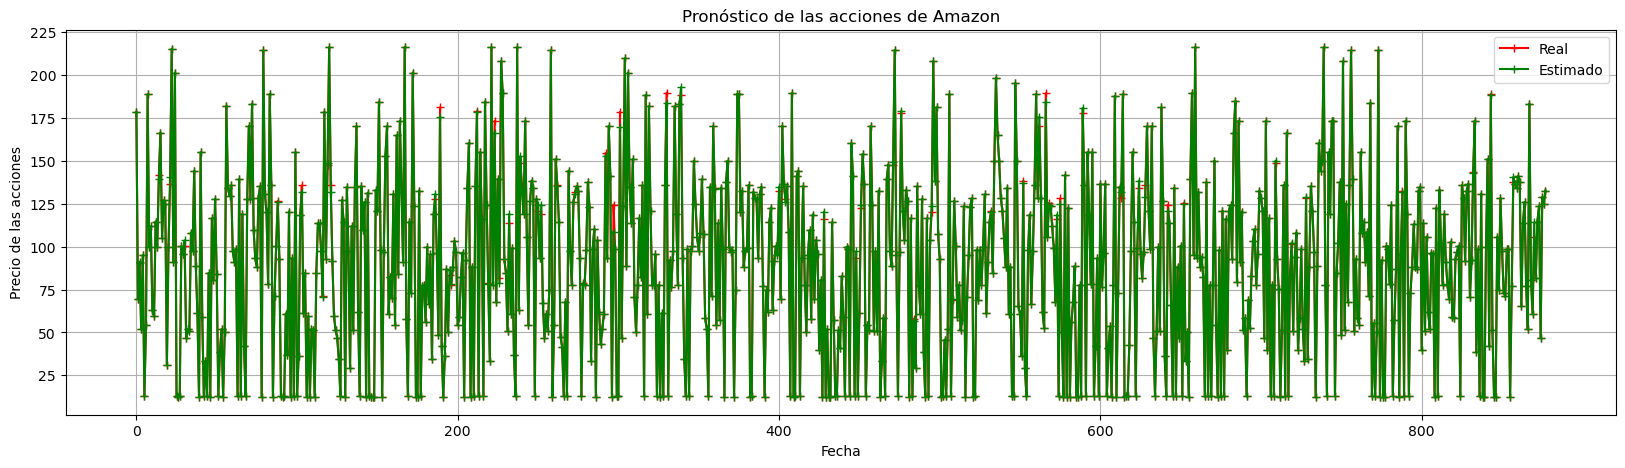

In [62]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [63]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,High,0.879669
2,Low,0.115877
0,Open,0.004454


#### **Conformación del árbol**

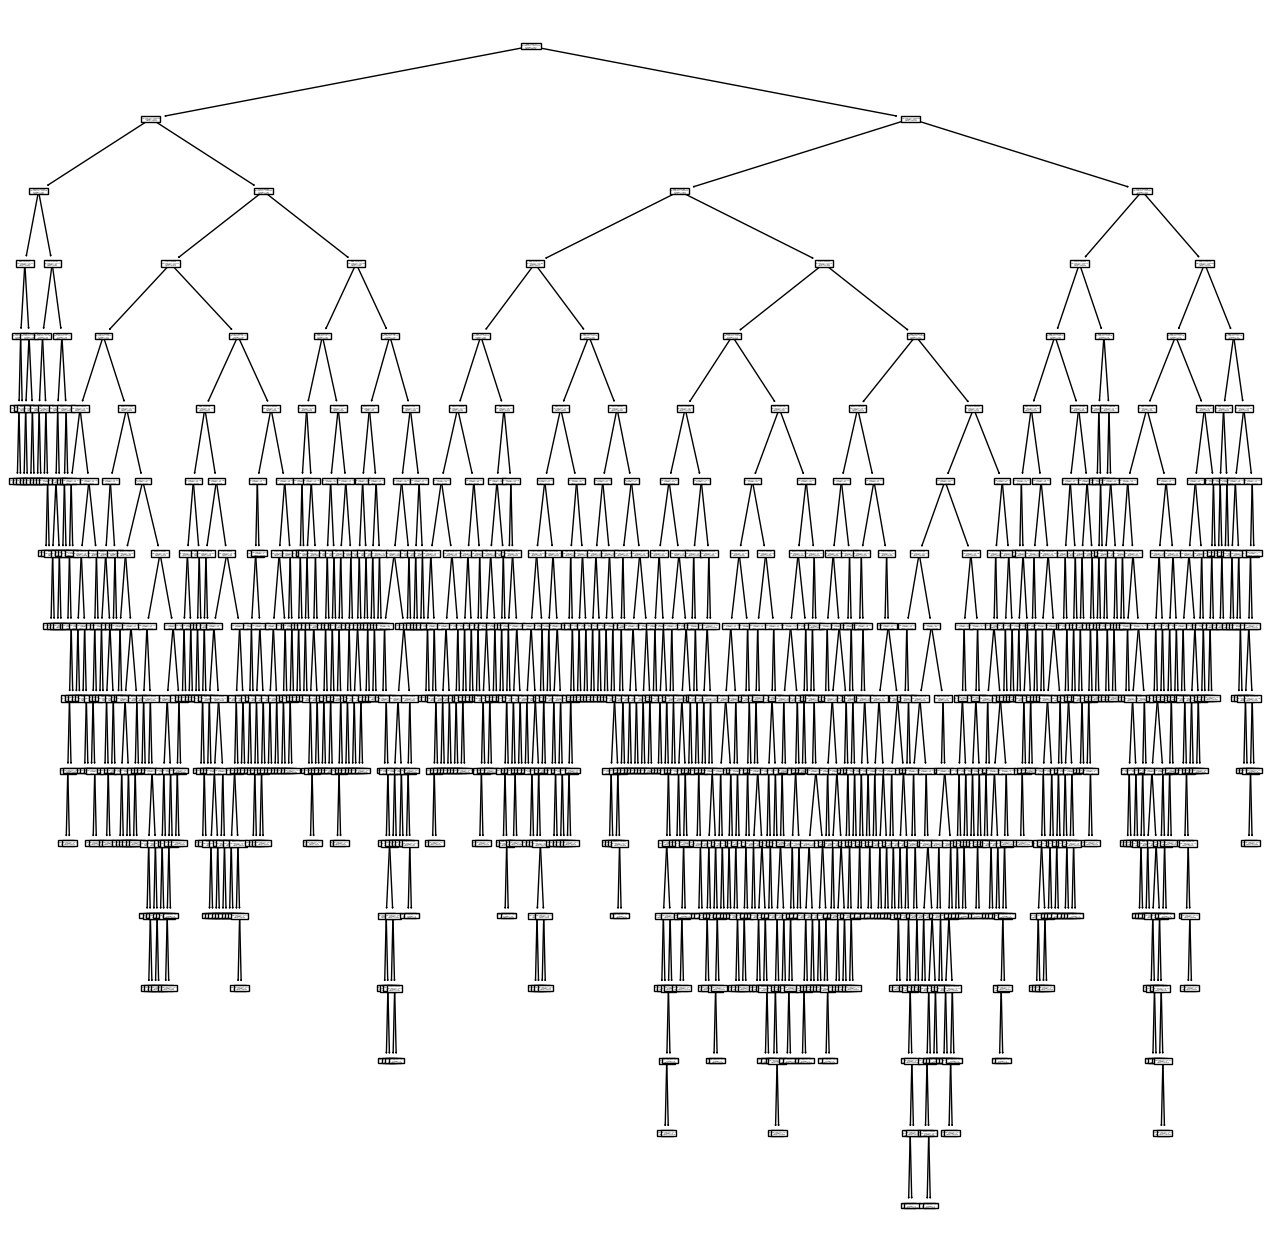

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
plt.show()

In [65]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- High <= 82.38
|   |--- Low <= 37.45
|   |   |--- Open <= 21.17
|   |   |   |--- High <= 12.65
|   |   |   |   |--- Open <= 12.49
|   |   |   |   |   |--- Open <= 12.35
|   |   |   |   |   |   |--- value: [12.28]
|   |   |   |   |   |--- Open >  12.35
|   |   |   |   |   |   |--- value: [12.43]
|   |   |   |   |--- Open >  12.49
|   |   |   |   |   |--- value: [12.56]
|   |   |   |--- High >  12.65
|   |   |   |   |--- Open <= 12.95
|   |   |   |   |   |--- High <= 12.79
|   |   |   |   |   |   |--- value: [12.74]
|   |   |   |   |   |--- High >  12.79
|   |   |   |   |   |   |--- value: [12.84]
|   |   |   |   |--- Open >  12.95
|   |   |   |   |   |--- Low <= 13.12
|   |   |   |   |   |   |--- value: [13.06]
|   |   |   |   |   |--- Low >  13.12
|   |   |   |   |   |   |--- value: [13.18]
|   |   |--- Open >  21.17
|   |   |   |--- Low <= 31.74
|   |   |   |   |--- Open <= 30.45
|   |   |   |   |   |--- Open <= 29.59
|   |   |   |   |   |   |--- value: [29.16]
|   |   |   |   |  

#### **Nuevos pronósticos**

In [66]:
PrecioAccion = pd.DataFrame({'Open': [108.2],
                             'High': [112.2], 
                             'Low': [100.8]})
PronosticoAD.predict(PrecioAccion)

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([114.1269455])

In [67]:
PrecioAccion.columns.to_list()

['Open', 'High', 'Low']